In [8]:
#standard imports
import numpy as np
import pandas as pd
#viz and stats
import pydataset
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import pearsonr, spearmanr

# sklearn's preprocessing contains our scalers:
# minmax, standard, robust
#from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import sklearn.preprocessing
import warnings
warnings.filterwarnings("ignore")
#my wrangle file 
import wrangle
#split data
from sklearn.model_selection import train_test_split

import env

### Exercises
### Our Zillow scenario continues:

### As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

### In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

### 1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

In [9]:
#acquire data
df = wrangle.wrangle_zillow()
df

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
7,3,2.0,2077,646760,1926,7924.68,6037
18,3,1.0,1244,169471,1950,2532.88,6037
19,3,2.0,1300,233266,1950,3110.99,6037
20,3,2.0,1222,290492,1951,3870.25,6037
40,2,1.0,725,37548,1953,576.47,6037
...,...,...,...,...,...,...,...
2152815,4,2.0,1484,71859,1955,1135.72,6037
2152824,2,1.0,710,175319,1940,2040.78,6111
2152831,3,2.0,1194,271536,1954,3555.73,6037
2152852,3,2.0,1917,408680,1946,4341.32,6111


### 2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.



In [10]:
#split data
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

In [11]:
#check column shape
train.shape

(1023397, 7)

In [12]:
#check column info
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023397 entries, 1927212 to 55990
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1023397 non-null  int64  
 1   bathrooms   1023397 non-null  float64
 2   area        1023397 non-null  int64  
 3   tax_value   1023397 non-null  int64  
 4   year_built  1023397 non-null  int64  
 5   tax_amount  1023397 non-null  float64
 6   fips        1023397 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 62.5 MB


In [13]:
#make, fit, use
columns = ['bedrooms', 'bathrooms', 'area', 'tax_value','year_built','tax_amount','fips']

In [14]:
train.head(2)


,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
1927212,3,2.0,2365,529671,1976,5644.78,6111
539627,4,3.0,2434,161495,1960,2103.93,6037


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,1827497.0,3.223397,0.778679,2.00,3.00,3.00,4.0,5.0
bathrooms,1827497.0,2.068815,0.704025,1.00,2.00,2.00,2.5,4.0
area,1827497.0,1662.363599,568.340024,1.00,1236.00,1555.00,2000.0,3408.0
tax_value,1827497.0,334280.338279,205936.916525,22.00,175850.00,300202.00,458596.0,4618021.0
year_built,1827497.0,1960.259549,19.149867,1914.00,1950.00,1958.00,1972.0,2008.0
tax_amount,1827497.0,4139.162389,2316.021497,16.48,2394.48,3786.16,5552.4,11009.0
fips,1827497.0,6048.505298,20.617662,6037.00,6037.00,6037.00,6059.0,6111.0


### 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.



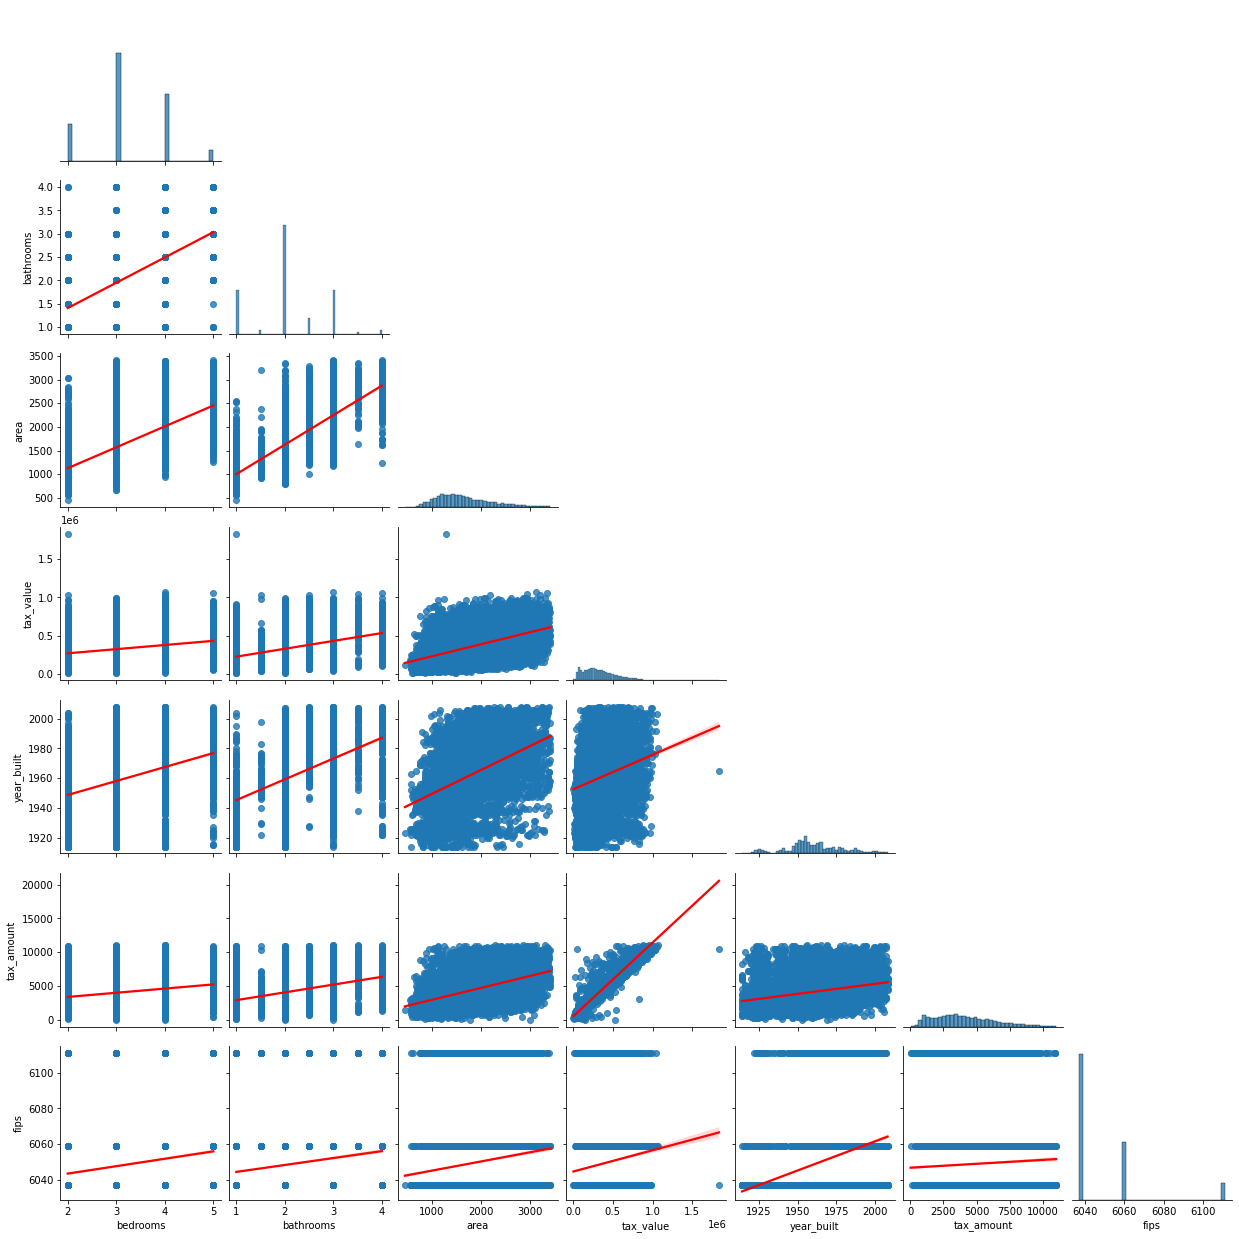

In [26]:
#write a function and vizualise pairplot
def plot_variable_pairs(df):
    sns.pairplot(data=df.sample(10000), kind='reg', corner = True, plot_kws={'line_kws':{'color':'red'}})
plot_variable_pairs(train)

### Explorations

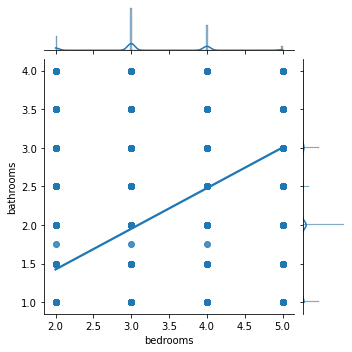

In [11]:
#correlation between bedrooms & bathrooms
sns.jointplot(x="bedrooms", y="bathrooms", data=train,  kind='reg', height=5)
plt.show()

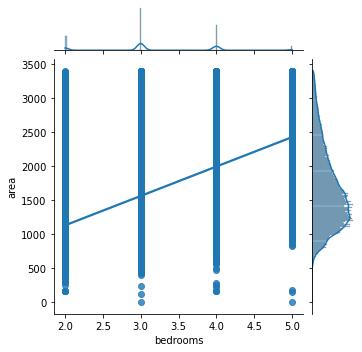

In [28]:
#correlation between bedrooms & area
sns.jointplot(x="bedrooms", y="area", data=train,  kind='reg', height=5)
plt.show()

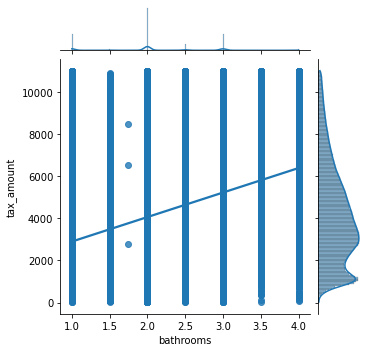

In [27]:
#correlation between bathrooms & tax amount
sns.jointplot(x="bathrooms", y="tax_amount", data=train,  kind='reg', height=5)
plt.show()

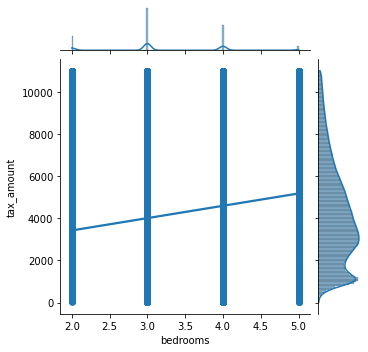

In [14]:
#correlation between bedrooms & tax amount
sns.jointplot(x="bedrooms", y="tax_amount", data=train,  kind='reg', height=5)
plt.show()

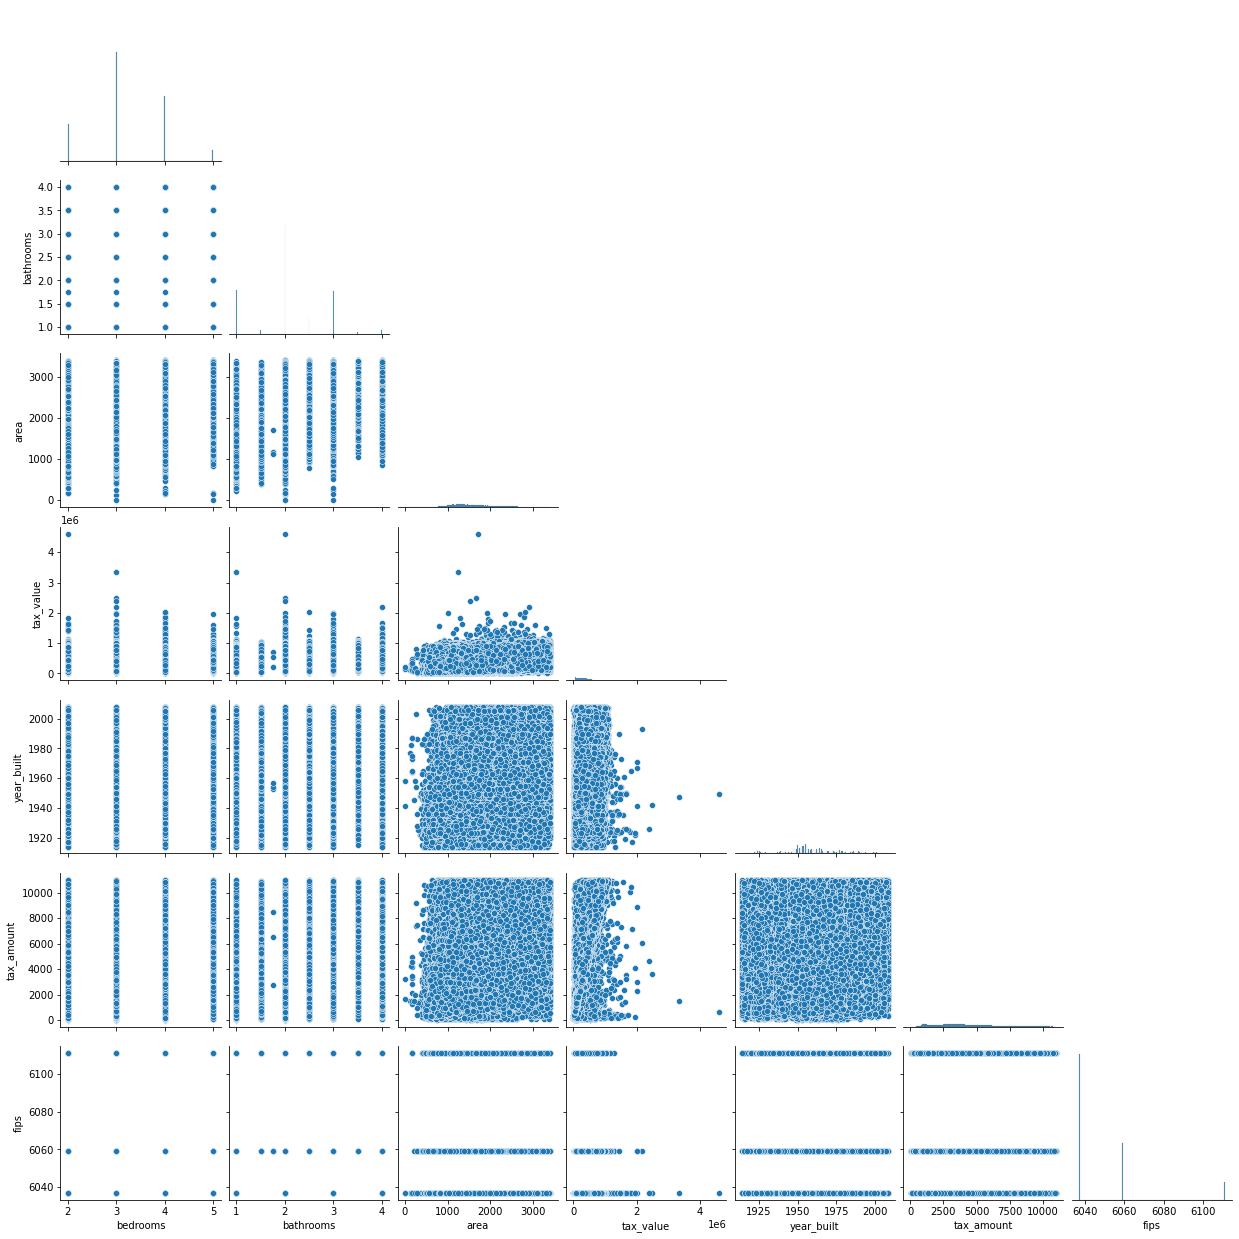

In [33]:
# We can drop the redundant information in the upper right half of the chart if we like.

sns.pairplot(train[['bedrooms', 'bathrooms', 'area', 'tax_value', 'year_built', 'tax_amount', 'fips']], corner=True)
plt.show()


### 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [30]:
#categorise columns 
cat_var = ["bedrooms","bathrooms","area","year_built"]
con_var = ["tax_amount","tax_value"]

In [34]:
#define funtion with features and outputs 3 different plots
def plot_categorical_and_continous(cat_var,con_var):
    plt.figure(figsize= (20,10))
    plt.subplot(131)
    sns.boxplot(x = cat_var, y = con_var, data = train.sample(10000))
    plt.subplot(132)
    sns.swarmplot(x = cat_var, y = con_var, data = train.sample(10000))
    plt.subplot(133)
    sns.barplot(x = cat_var, y = con_var, data = train.sample(10000))
    plt.figure()
    plt.show()


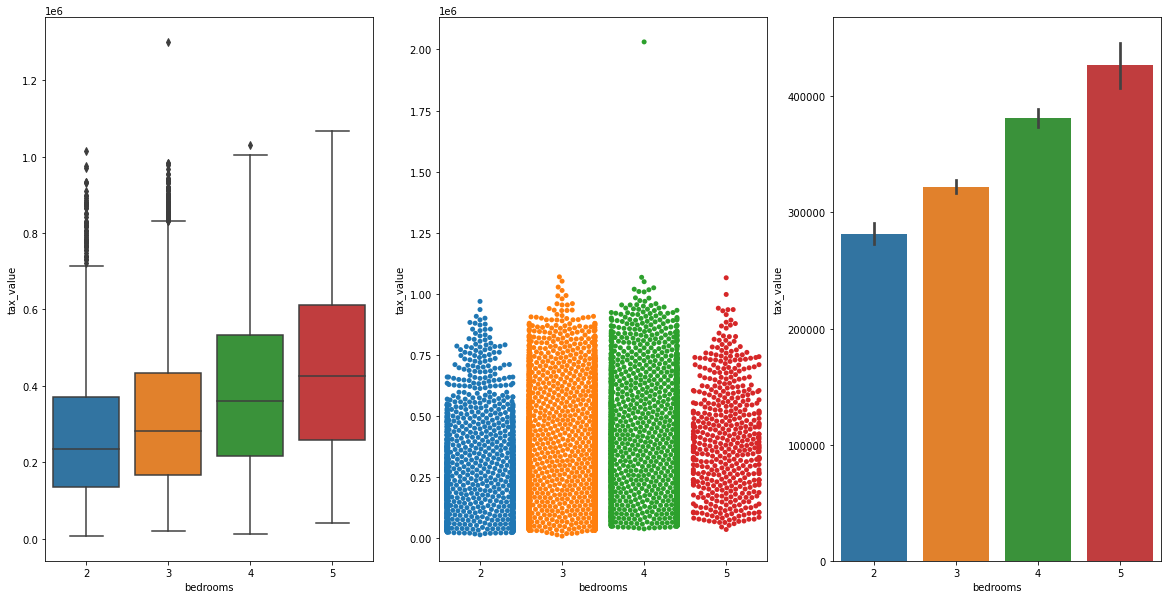

<Figure size 432x288 with 0 Axes>

In [35]:
#plot graph
plot_categorical_and_continous("bedrooms","tax_value")
plt.show()

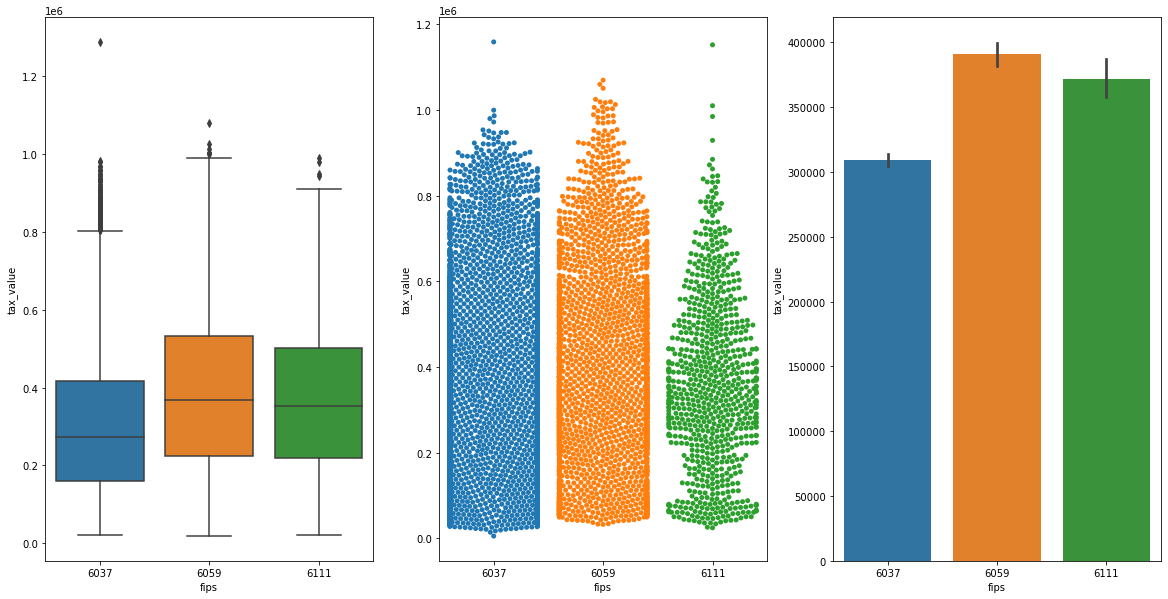

<Figure size 432x288 with 0 Axes>

In [37]:
#plot graph
plot_categorical_and_continous("fips","tax_value")
plt.show()

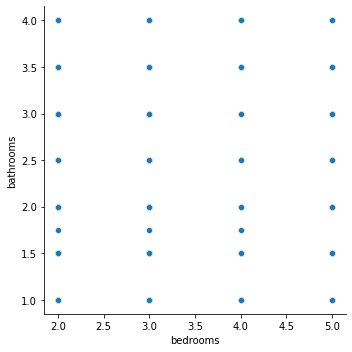

In [29]:
plot_categorical = [['bedrooms', 'bathrooms']]
for col in plot_categorical:
    plot = sns.relplot(x="bedrooms", y="bathrooms", data=train)
    plt.show()

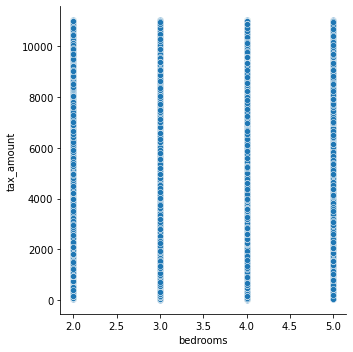

In [19]:
sns.relplot(x="bedrooms", y="tax_amount", data=train)
plt.show()

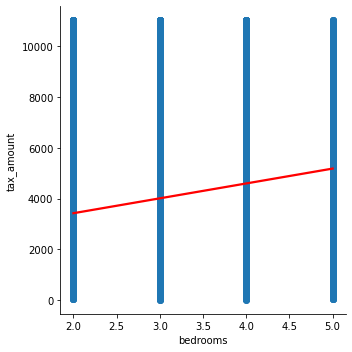

In [35]:
# I can pop that line color if I want.

sns.lmplot(x="bedrooms", y="tax_amount", data=train, line_kws={'color': 'red'})
plt.show()


###  Come up with some initial hypotheses based on your goal of predicting property value.



In [ ]:
#Initial Hypothesis for predicting property value:
#- More bedrooms and more bathrooms are associated with higher tax value
#- Greater area is associated with higher tax value
#- The more new built homes the higher the tax value


In [25]:
#Hypothesis
#H0: there is no there linear correlation between bedrooms and bathrooms
#Ha: there is a linear correlation between bedrooms and bathrooms
